**Azalea Yunus x Benji Andrews**

Fall 2020

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [27]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Goal

**Make sure any debug printouts do not appear if `verbose=False`!**

This week, you will test your CNN on the STL-10 dataset! The last step before you can do this is implementing an optimizer to update your network weights during gradient descent. You will implement a few and compare them.

## Task 5: Implement weight optimizers for gradient descent

To change the weights during training, we need an optimization algorithm to have our loss decrease over epochs as we learn the structure of the input patterns. Until now, we used **Stochastic gradient descent (SGD)**, which is the simplest algorithm. You will implement 3 popular algorithms:

- `SGD` (stochastic gradient descent)
- `SGD_Momentum` (stochastic gradient descent with momentum)
- `Adam` (Adaptive Moment Estimation)

Implement each of these according to the update equations (the `update_weights()` in each subclass in `optimizer.py`). Let's use $w_t$ in the math below to represent the weights in a layer at time step $t$, $dw$ to represent the gradient of the weights in a layer, and $\eta$ represent the learning rate. We use vectorized notation below (update applies to all weights element-wise). Then:

**SGD**: 

$w_{t} = w_{t-1} - \eta \times dw$

**SGD (momentum)**:

$v_{t} = m \times v_{t-1} - \eta \times dw$

$w_{t} = w_{t-1} + v_t$

where $v_t$ is called the `velocity` at time $t$. At the first time step (0), velocity should be set to all zeros and have the same shape as $w$. $m$ is a constant that determines how much of the gradient obtained on the previous time step should factor into the weight update for the current time step.


**Adam**:

$m_{t} = \beta_1 \times m_{t-1} + (1 - \beta_1)\times dw$

$v_{t} = \beta_2 \times v_{t-1} + (1 - \beta_2)\times dw^2$

$n = m_{t} / \left (1-(\beta_1^t) \right )$

$u = v_{t} / \left (1-(\beta_2^t) \right )$

$w_{t} = w_{t-1} - \left ( \eta \times n \right ) / \left ( \sqrt(u) + \epsilon \right ) $


Like SGD (momentum), Adam records momentum terms $m$ and $v$. At time step 0, you should initialize them to zeros in an array equal in size to the weights. $n$ and $u$ are variables computed on each time step. The remaining quantities are constants. Note that $t$ keeps track of the integer time step, and needs to be incremented on each update. 

In [28]:
from optimizer import *

####  Test SGD

In [29]:
np.random.seed(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = np.random.randn(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]


Output should be:

    SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
    SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]

####  Test SGD_Momentum

In [30]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 1.6879486  0.3879897  0.9343517  2.2075258]
 [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
 [ 0.1520801  0.3452366  0.0576     1.52849  ]]
SGD M: Wts after 2 iter
[[ 1.5661825  0.3685217  0.8633335  2.1541379]
 [ 1.4790974 -0.9239367  0.8686908  0.0707077]
 [ 0.5605585  0.2406577 -0.0807098  1.6472364]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 1.6879486  0.3879897  0.9343517  2.2075258]
     [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
     [ 0.1520801  0.3452366  0.0576     1.52849  ]]
    SGD M: Wts after 2 iter
    [[ 1.5661825  0.3685217  0.8633335  2.1541379]
     [ 1.4790974 -0.9239367  0.8686908  0.0707077]
     [ 0.5605585  0.2406577 -0.0807098  1.6472364]]

####  Test Adam

In [31]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 1.6640523  0.3001572  0.878738   2.1408932]
 [ 1.767558  -0.8772779  0.8500884 -0.0513572]
 [-0.0032189  0.3105985  0.0440436  1.5542735]]
Adam: Wts after 2 iter
[[ 1.5640523  0.2001572  0.778738   2.0408932]
 [ 1.667558  -0.7772779  0.7500884  0.0486428]
 [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
Adam: Wts after 3 iter
[[ 1.4640523  0.1001572  0.678738   1.9408932]
 [ 1.567558  -0.6772779  0.6500884  0.1486428]
 [ 0.1967811  0.1105985 -0.1559564  1.7542735]]


Output should be:

    Adam: Wts after 1 iter
    [[ 1.6640523  0.3001572  0.878738   2.1408932]
     [ 1.767558  -0.8772779  0.8500884 -0.0513572]
     [-0.0032189  0.3105985  0.0440436  1.5542735]]
    Adam: Wts after 2 iter
    [[ 1.5640523  0.2001572  0.778738   2.0408932]
     [ 1.667558  -0.7772779  0.7500884  0.0486428]
     [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
    Adam: Wts after 3 iter
    [[ 1.4640523  0.1001572  0.678738   1.9408932]
     [ 1.567558  -0.6772779  0.6500884  0.1486428]
     [ 0.1967811  0.1105985 -0.1559564  1.7542735]]  

## Task 6: Write network training methods

Implement methods in `network.py` to actually train the network, using all the building blocks that you have created. The methods to implement are:

- `predict`
- `fit`

## Task 7: Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-based neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. your CNN). You will use this strategy to verify that your network is working.

Let's use a small amount of real data from STL-10 to perform the overfitting test.

### 7a. Move `load_stl10_dataset` and `preprocess_data.py` from the MLP project

Make the one following change in `preprocess_data.py`:

- In `preprocess_stl`, Re-arrange dimensions of `imgs` so that when it is returned, `shape=(Num imgs, RGB color chans, height, width)` (No longer flatten non-batch dimensions)
- In `load_stl10`, add an optional parameter to the function `scale_fact=3`, which specifies the factor by which to downscale the STL-10 images. The default (`scale_fact=3`) reduces the resolution from 96x96 to 32x32. Achieve this downscaling by passing along the optional parameter value when the `load` function in `load_stl10_dataset.py`.

In [6]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4
import optimizer

### 7b. Load in STL-10 at 16x16 resolution

If you don't want to wait for STL-10 to download from the internet and resize, copy over your data and numpy folders from your MLP project.

**Note:** The different train/test split here won't work if you hard coded the proportions in your `create_splits` implementation! *This isn't catastrophic, it just means that it will take longer to compute accuracy on the validation set.*

In [7]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4578, n_test_samps=400, n_valid_samps=2, n_dev_samps=20, scale_fact=6)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4578, 3, 16, 16)
Train labels shape:  (4578,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (20, 3, 16, 16)
dev labels shape:  (20,)


In [8]:
# Adam
adam_net = ConvNet4(input_shape=(3, 16, 16), reg=5e-3, verbose=False)
adam_net.compile('adam', lr=1e-2)
adam_net.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=5, n_epochs=250, acc_freq=50, print_every=100)

--------------- Starting to train ---------------
4 iterations. 0.016 iter/epoch.
Loss is 2.3028828652889937, training accuracy is 0.15, and validation accuracy is 0.0 at Iteration 0.
Loss is 2.0514446727983784, training accuracy is 0.3, and validation accuracy is 0.5 at Iteration 100.
Loss is 0.47156538999653896, training accuracy is 0.8, and validation accuracy is 0.5 at Iteration 200.
Loss is 0.8752619929501805, training accuracy is 0.85, and validation accuracy is 0.5 at Iteration 300.
Loss is 0.5297250030591059, training accuracy is 0.95, and validation accuracy is 0.5 at Iteration 400.
Loss is 0.1729478171407213, training accuracy is 1.0, and validation accuracy is 0.5 at Iteration 500.
Loss is 0.1586756703682881, training accuracy is 1.0, and validation accuracy is 0.5 at Iteration 600.
Loss is 0.14433722564321436, training accuracy is 1.0, and validation accuracy is 0.5 at Iteration 700.
Loss is 0.13230881340268297, training accuracy is 1.0, and validation accuracy is 0.5 at It

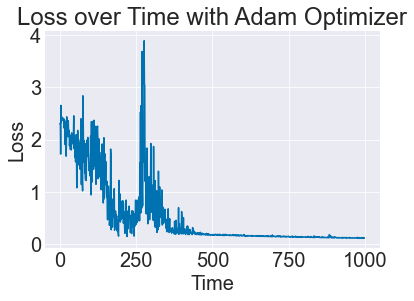

In [9]:
# Adam plot
plt.plot(adam_net.loss_history)
plt.xlabel("Time")
plt.ylabel("Loss")
plt.title("Loss over Time with Adam Optimizer")
plt.show()

In [10]:
# SGD-M
sgdm_net = ConvNet4(input_shape=(3, 16, 16), reg=5e-3, verbose=False)
sgdm_net.compile('sgd_momentum', lr=1e-2)
sgdm_net.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=5, n_epochs=250, acc_freq=50, print_every=100)

--------------- Starting to train ---------------
4 iterations. 0.016 iter/epoch.
Loss is 2.3033029936443277, training accuracy is 0.15, and validation accuracy is 0.0 at Iteration 0.
Loss is 2.0276357711231605, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 100.
Loss is 2.3392273078633035, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 200.
Loss is 1.8260589580395648, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 300.
Loss is 2.1377824031034964, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 400.
Loss is 1.6162028075684323, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 500.
Loss is 1.8929123430415156, training accuracy is 0.35, and validation accuracy is 0.0 at Iteration 600.
Loss is 1.6427847019395343, training accuracy is 0.35, and validation accuracy is 0.5 at Iteration 700.
Loss is 0.38349397078085234, training accuracy is 0.4, and validation accuracy is 0.5 at

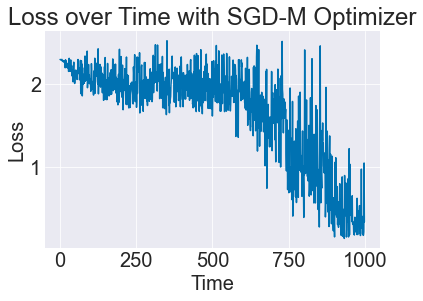

In [11]:
# SGD-M plot
plt.plot(sgdm_net.loss_history)
plt.xlabel("Time")
plt.ylabel("Loss")
plt.title("Loss over Time with SGD-M Optimizer")
plt.show()

In [12]:
# SGD
sgd_net = ConvNet4(input_shape=(3, 16, 16), reg=5e-3, verbose=False)
sgd_net.compile('sgd', lr=1e-2)
sgd_net.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=5, n_epochs=250, acc_freq=50, print_every=100)

--------------- Starting to train ---------------
4 iterations. 0.016 iter/epoch.
Loss is 2.302808496459992, training accuracy is 0.1, and validation accuracy is 0.0 at Iteration 0.
Loss is 2.1935964828214978, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 100.
Loss is 2.2336484661238676, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 200.
Loss is 2.110851405359475, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 300.
Loss is 2.1426851657376154, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 400.
Loss is 2.065138247810511, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 500.
Loss is 1.8927939390527644, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 600.
Loss is 1.9451787025578033, training accuracy is 0.25, and validation accuracy is 0.5 at Iteration 700.
Loss is 2.1208147342474657, training accuracy is 0.25, and validation accuracy is 0.5 at Ite

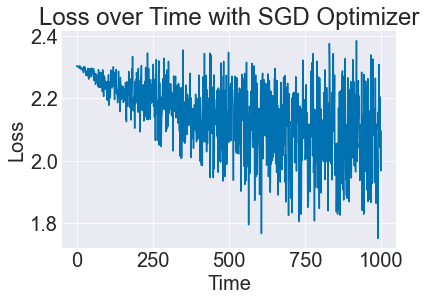

In [13]:
# SGD plot
plt.plot(sgd_net.loss_history)
plt.xlabel("Time")
plt.ylabel("Loss")
plt.title("Loss over Time with SGD Optimizer")
plt.show()

### 7d. Evaluate and plot the different optimizer results

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

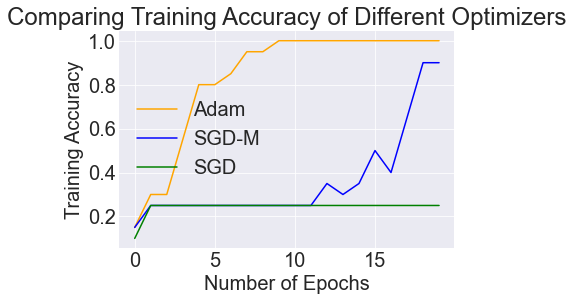

In [14]:
plt.plot(adam_net.train_acc_history, color="orange", label="Adam")
plt.plot(sgdm_net.train_acc_history, color="blue", label="SGD-M")
plt.plot(sgd_net.train_acc_history, color="green", label="SGD")
plt.title("Comparing Training Accuracy of Different Optimizers")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.legend()
plt.show()

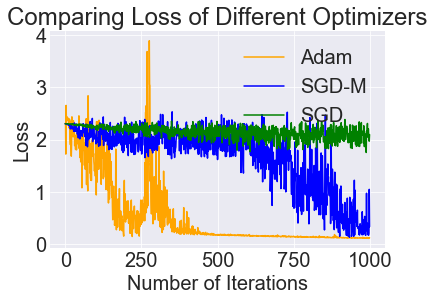

In [15]:
plt.plot(adam_net.loss_history, color="orange", label="Adam")
plt.plot(sgdm_net.loss_history, color="blue", label="SGD-M")
plt.plot(sgd_net.loss_history, color="green", label="SGD")
plt.title("Comparing Loss of Different Optimizers")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 7e. Questions

**Question 3**: Why does decreasing the mini-batch size make the loss print-outs more erratic in Task 7c?

**Question 4**: Which optimizer works best and why do think it is best?

**Question 5**: What is happening with the training set accuracy and why?

**Answer 3:** 
Having a smaller mini-batch size reduces the generalizability of the neural network, and lends the network to overfitting. Thus, a smaller mini-batch size results in a less smooth curve in terms of loss over time as seen in the loss graphs done for each optimizer during training.

**Answer 4:** 
For the STL-10 dataset, the Adam optimizer works the best. While training, it demonstrated a rapid decrease in loss from approximately 2 to 0.5 just between the 100th and 200th iterations. It also got to the lowest final loss at 0.12. Also during training, it achieved a training accuracy of 100% by the 500th iteration. SGD-M works worse than Adam, but better than SGD. It was here that upping the number of epochs to 250 unlocked the potential of SGD-M as an optimizer. For most of the iterations (as shown in the training print-outs), the loss decreased slowly until approximately the 800th and 900th iterations where the loss decreased dramatically from 1.6 to 0.38 and 0.33 respectively. The final loss of 0.33 was higher that of Adam, and lower than that of SGD. For most of the iterations (as shown in the training print-outs), the accuracy increased slowly until between 800th and 900th iterations where the accuracy increased dramatically from 0.4 to 0.9. SGD is the worst optimizer, demonstrating the lowest accuracy (25%) and highest loss (2.1) near the end of training.

**Answer 5:** 
The training set accuracy improves the most and achieves 100% only with the Adam optimizer, while both SGD-M and SGD optimizers achieve training set accuracies of 25-35%. This is likely because Adam enables the learning rate to be dynamic and change alongside weights rather than static as in both SGD-M and SGD.

### 7c. Train and overfit the network on a small STL-10 sample with each optimizer

#### Goal

If your network works, you should see a drop in loss over epochs to 0 from the initial value of ~2.3.

#### Todo

In 3 seperate cells below

- Create 3 different `ConvNet4` networks.
- Compile each with a different optimizer (i.e. each net uses a different optimizer).
- Train each on the **dev** set and validate on the tiny validation set (we don't care about out-of-training-set performance here).

You will be making plots demonstrating the overfitting for each optimizer below. **You should train the nets with the same number of epochs such that at least 2/3 of them clearly show loss convergence to a small value; one optimizer may not converge yet, and that's ok**. Cut off the simulations based on the 2/3 that do converge.

#### Guidelines

- Weight scales and learning rates of `1e-2` should work well.
- Start by testing the Adam optimizer.
- Remember that the input shape is (3, 16, 16). You need to specify this to the network constructor.
- The hyperparameters are up to you, though I wouldn't recommend a batch size that is too small (close to 1), otherwise it may be tricky to see whether the loss is actually decreasing on average.
- Decreasing `acc_freq` will make the `fit` function evaluate the training and validation accuracy more often. This is a computationally intensive process, so small values come with an increase in training time. On the other hand, checking the accuracy too infrequently means you won't know whether the network is trending toward overfitting the training data, which is what you're checking for.
- Each training session takes ~15 mins on my laptop.

#### Caveat emptor

Training convolutional networks is notoriously computationally intensive. If you experiment with hyperparameters, each training session may take several hours.

- Use the loss/accuracy print outs to quickly gauge whether your hyperparameter choices are getting your network to decrease in loss.
- Monitor print outs and interrupt the Jupyter kernel if things are not trending in the right direction.

## Task 8: Training your convolutional neural network on STL-10

### 8a. Load in STL-10 at 32x32 resolution

In [9]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4398, n_test_samps=400, n_valid_samps=200, n_dev_samps=2, scale_fact=3)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4398, 3, 32, 32)
Train labels shape:  (4398,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (200, 3, 32, 32)
Validation labels shape:  (200,)
dev data shape:  (2, 3, 32, 32)
dev labels shape:  (2,)


### 8b. Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=20) in a reasonable amount of time. The training set is N=4000, how will we ever manage to process that amount of data?!

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to C code, we will speed up training up by several orders of magnitude**.

Follow these steps to subsitute in the "accelerated" convolution and max pooling layers.

- Install the `cython` python package: `pip3 install cython` (or `pip3 install cython --user` if working in Davis 102)
- Dowload files `im2col_cython.pyx`, `accelerated_layer.py`, `setup.py` from the project website. Put them in your base project folder.
- Open terminal, `cd` to Project directory.
- Compile the im2col functions: `python3 setup.py build_ext --inplace`. A `.c` and `.so` file should have appeared in your project folder.
- Restart Jupyter Notebook kernel
- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`. Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPooling2D` layers with `Conv2DAccel` and `MaxPooling2DAccel`.

### 8c. Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve 45% accuracy on the test and/or validation set.

#### Notes

- I suggest using your intuition about hyperparameters and over/underfitting to guide your choice, rather than a grid search. This should not be overly challenging.
- Use the best / most efficient optimizer based on your prior analysis.
- It should take on the order of 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the acclerated code.

In [21]:
from network import ConvNet4Accel
fast_net = ConvNet4Accel(input_shape=(3,32,32),reg=5e-4)
fast_net.compile("adam", lr=1e-3)
acc, val = fast_net.fit(x_train, y_train, x_val, y_val, mini_batch_sz=200, n_epochs=80, acc_freq=50, print_every=10)

Starting to train...
22 iterations. 0.275 iter/epoch.
Loss is 2.3028000863850537, training accuracy is 0.092, and validation accuracy is 0.105 at Iteration 0.
loop 0 of 1760. time was 10.64 sec
loop 1 of 1760. time was 4.08 sec
loop 2 of 1760. time was 4.2 sec
loop 3 of 1760. time was 4.25 sec
loop 4 of 1760. time was 4.07 sec
loop 5 of 1760. time was 4.13 sec
loop 6 of 1760. time was 4.1 sec
loop 7 of 1760. time was 4.04 sec
loop 8 of 1760. time was 4.22 sec
loop 9 of 1760. time was 4.13 sec
Loss is 2.3012752544198807, training accuracy is 0.092, and validation accuracy is 0.105 at Iteration 10.
loop 10 of 1760. time was 4.27 sec
loop 11 of 1760. time was 4.26 sec
loop 12 of 1760. time was 4.16 sec
loop 13 of 1760. time was 4.24 sec
loop 14 of 1760. time was 4.21 sec
loop 15 of 1760. time was 4.07 sec
loop 16 of 1760. time was 4.23 sec
loop 17 of 1760. time was 4.16 sec
loop 18 of 1760. time was 4.12 sec
loop 19 of 1760. time was 4.19 sec
Loss is 2.207706299156512, training accuracy i

loop 177 of 1760. time was 4.28 sec
loop 178 of 1760. time was 4.2 sec
loop 179 of 1760. time was 4.22 sec
Loss is 1.6156268435700951, training accuracy is 0.372, and validation accuracy is 0.35 at Iteration 180.
loop 180 of 1760. time was 4.17 sec
loop 181 of 1760. time was 4.16 sec
loop 182 of 1760. time was 4.18 sec
loop 183 of 1760. time was 4.13 sec
loop 184 of 1760. time was 4.24 sec
loop 185 of 1760. time was 4.24 sec
loop 186 of 1760. time was 4.21 sec
loop 187 of 1760. time was 4.14 sec
loop 188 of 1760. time was 4.15 sec
loop 189 of 1760. time was 4.23 sec
Loss is 1.5929381944990133, training accuracy is 0.372, and validation accuracy is 0.35 at Iteration 190.
loop 190 of 1760. time was 4.21 sec
loop 191 of 1760. time was 4.12 sec
loop 192 of 1760. time was 4.17 sec
loop 193 of 1760. time was 4.17 sec
loop 194 of 1760. time was 4.18 sec
loop 195 of 1760. time was 4.23 sec
loop 196 of 1760. time was 4.15 sec
loop 197 of 1760. time was 4.22 sec
loop 198 of 1760. time was 4.21 s

loop 353 of 1760. time was 4.19 sec
loop 354 of 1760. time was 4.2 sec
loop 355 of 1760. time was 4.14 sec
loop 356 of 1760. time was 4.09 sec
loop 357 of 1760. time was 4.24 sec
loop 358 of 1760. time was 4.13 sec
loop 359 of 1760. time was 4.15 sec
Loss is 1.347352925802133, training accuracy is 0.502, and validation accuracy is 0.4 at Iteration 360.
loop 360 of 1760. time was 4.12 sec
loop 361 of 1760. time was 4.13 sec
loop 362 of 1760. time was 4.03 sec
loop 363 of 1760. time was 4.11 sec
loop 364 of 1760. time was 4.14 sec
loop 365 of 1760. time was 4.16 sec
loop 366 of 1760. time was 4.13 sec
loop 367 of 1760. time was 4.19 sec
loop 368 of 1760. time was 4.2 sec
loop 369 of 1760. time was 4.08 sec
Loss is 1.2576585047463686, training accuracy is 0.502, and validation accuracy is 0.4 at Iteration 370.
loop 370 of 1760. time was 4.14 sec
loop 371 of 1760. time was 4.23 sec
loop 372 of 1760. time was 4.27 sec
loop 373 of 1760. time was 4.25 sec
loop 374 of 1760. time was 4.27 sec
l

loop 531 of 1760. time was 4.22 sec
loop 532 of 1760. time was 4.19 sec
loop 533 of 1760. time was 4.2 sec
loop 534 of 1760. time was 4.18 sec
loop 535 of 1760. time was 4.23 sec
loop 536 of 1760. time was 4.21 sec
loop 537 of 1760. time was 4.09 sec
loop 538 of 1760. time was 4.09 sec
loop 539 of 1760. time was 4.12 sec
Loss is 1.1059143836181307, training accuracy is 0.602, and validation accuracy is 0.45 at Iteration 540.
loop 540 of 1760. time was 4.13 sec
loop 541 of 1760. time was 4.15 sec
loop 542 of 1760. time was 4.22 sec
loop 543 of 1760. time was 4.23 sec
loop 544 of 1760. time was 4.14 sec
loop 545 of 1760. time was 4.08 sec
loop 546 of 1760. time was 4.3 sec
loop 547 of 1760. time was 4.18 sec
loop 548 of 1760. time was 4.17 sec
loop 549 of 1760. time was 4.2 sec
Loss is 1.2079343642820404, training accuracy is 0.548, and validation accuracy is 0.45 at Iteration 550.
loop 550 of 1760. time was 7.61 sec
loop 551 of 1760. time was 3.99 sec
loop 552 of 1760. time was 4.16 sec

Loss is 0.9804518839538372, training accuracy is 0.69, and validation accuracy is 0.46 at Iteration 710.
loop 710 of 1760. time was 4.15 sec
loop 711 of 1760. time was 4.17 sec
loop 712 of 1760. time was 4.16 sec
loop 713 of 1760. time was 4.22 sec
loop 714 of 1760. time was 4.18 sec
loop 715 of 1760. time was 4.21 sec
loop 716 of 1760. time was 4.2 sec
loop 717 of 1760. time was 4.12 sec
loop 718 of 1760. time was 4.21 sec
loop 719 of 1760. time was 4.14 sec
Loss is 0.9562900284847299, training accuracy is 0.69, and validation accuracy is 0.46 at Iteration 720.
loop 720 of 1760. time was 4.12 sec
loop 721 of 1760. time was 4.11 sec
loop 722 of 1760. time was 4.15 sec
loop 723 of 1760. time was 4.09 sec
loop 724 of 1760. time was 4.12 sec
loop 725 of 1760. time was 4.18 sec
loop 726 of 1760. time was 4.13 sec
loop 727 of 1760. time was 4.21 sec
loop 728 of 1760. time was 4.1 sec
loop 729 of 1760. time was 4.16 sec
Loss is 0.9869904368069996, training accuracy is 0.69, and validation ac

loop 886 of 1760. time was 4.16 sec
loop 887 of 1760. time was 4.14 sec
loop 888 of 1760. time was 4.23 sec
loop 889 of 1760. time was 4.2 sec
Loss is 0.7363486246081633, training accuracy is 0.694, and validation accuracy is 0.495 at Iteration 890.
loop 890 of 1760. time was 4.19 sec
loop 891 of 1760. time was 4.23 sec
loop 892 of 1760. time was 4.19 sec
loop 893 of 1760. time was 4.17 sec
loop 894 of 1760. time was 4.19 sec
loop 895 of 1760. time was 4.22 sec
loop 896 of 1760. time was 4.22 sec
loop 897 of 1760. time was 4.22 sec
loop 898 of 1760. time was 4.19 sec
loop 899 of 1760. time was 4.2 sec
Loss is 0.7902381004137482, training accuracy is 0.788, and validation accuracy is 0.485 at Iteration 900.
loop 900 of 1760. time was 7.68 sec
loop 901 of 1760. time was 4.07 sec
loop 902 of 1760. time was 4.14 sec
loop 903 of 1760. time was 4.16 sec
loop 904 of 1760. time was 4.24 sec
loop 905 of 1760. time was 4.24 sec
loop 906 of 1760. time was 4.16 sec
loop 907 of 1760. time was 4.22 

loop 1061 of 1760. time was 4.14 sec
loop 1062 of 1760. time was 4.2 sec
loop 1063 of 1760. time was 4.18 sec
loop 1064 of 1760. time was 4.28 sec
loop 1065 of 1760. time was 4.24 sec
loop 1066 of 1760. time was 4.17 sec
loop 1067 of 1760. time was 4.18 sec
loop 1068 of 1760. time was 4.18 sec
loop 1069 of 1760. time was 4.2 sec
Loss is 0.6626711107644391, training accuracy is 0.812, and validation accuracy is 0.465 at Iteration 1070.
loop 1070 of 1760. time was 4.19 sec
loop 1071 of 1760. time was 4.14 sec
loop 1072 of 1760. time was 4.23 sec
loop 1073 of 1760. time was 4.2 sec
loop 1074 of 1760. time was 4.22 sec
loop 1075 of 1760. time was 4.22 sec
loop 1076 of 1760. time was 4.13 sec
loop 1077 of 1760. time was 4.19 sec
loop 1078 of 1760. time was 4.23 sec
loop 1079 of 1760. time was 4.26 sec
Loss is 0.67304460491474, training accuracy is 0.812, and validation accuracy is 0.465 at Iteration 1080.
loop 1080 of 1760. time was 4.18 sec
loop 1081 of 1760. time was 4.32 sec
loop 1082 of

loop 1234 of 1760. time was 4.2 sec
loop 1235 of 1760. time was 4.21 sec
loop 1236 of 1760. time was 4.26 sec
loop 1237 of 1760. time was 4.18 sec
loop 1238 of 1760. time was 4.07 sec
loop 1239 of 1760. time was 4.26 sec
Loss is 0.5169337249896955, training accuracy is 0.902, and validation accuracy is 0.5 at Iteration 1240.
loop 1240 of 1760. time was 4.24 sec
loop 1241 of 1760. time was 4.18 sec
loop 1242 of 1760. time was 4.17 sec
loop 1243 of 1760. time was 4.16 sec
loop 1244 of 1760. time was 4.25 sec
loop 1245 of 1760. time was 4.27 sec
loop 1246 of 1760. time was 4.23 sec
loop 1247 of 1760. time was 4.18 sec
loop 1248 of 1760. time was 4.28 sec
loop 1249 of 1760. time was 4.24 sec
Loss is 0.5385355139896033, training accuracy is 0.896, and validation accuracy is 0.48 at Iteration 1250.
loop 1250 of 1760. time was 7.87 sec
loop 1251 of 1760. time was 4.11 sec
loop 1252 of 1760. time was 4.1 sec
loop 1253 of 1760. time was 4.1 sec
loop 1254 of 1760. time was 4.15 sec
loop 1255 of 

loop 1407 of 1760. time was 4.11 sec
loop 1408 of 1760. time was 4.21 sec
loop 1409 of 1760. time was 4.15 sec
Loss is 0.3355236361671315, training accuracy is 0.928, and validation accuracy is 0.505 at Iteration 1410.
loop 1410 of 1760. time was 4.17 sec
loop 1411 of 1760. time was 4.26 sec
loop 1412 of 1760. time was 4.17 sec
loop 1413 of 1760. time was 4.24 sec
loop 1414 of 1760. time was 4.2 sec
loop 1415 of 1760. time was 4.12 sec
loop 1416 of 1760. time was 4.19 sec
loop 1417 of 1760. time was 4.1 sec
loop 1418 of 1760. time was 4.13 sec
loop 1419 of 1760. time was 4.28 sec
Loss is 0.36275698017350877, training accuracy is 0.928, and validation accuracy is 0.505 at Iteration 1420.
loop 1420 of 1760. time was 4.28 sec
loop 1421 of 1760. time was 4.15 sec
loop 1422 of 1760. time was 4.14 sec
loop 1423 of 1760. time was 4.17 sec
loop 1424 of 1760. time was 4.15 sec
loop 1425 of 1760. time was 4.26 sec
loop 1426 of 1760. time was 4.18 sec
loop 1427 of 1760. time was 4.1 sec
loop 1428

Loss is 0.27001513317898207, training accuracy is 0.964, and validation accuracy is 0.485 at Iteration 1580.
loop 1580 of 1760. time was 4.29 sec
loop 1581 of 1760. time was 4.25 sec
loop 1582 of 1760. time was 4.22 sec
loop 1583 of 1760. time was 4.14 sec
loop 1584 of 1760. time was 4.16 sec
loop 1585 of 1760. time was 4.2 sec
loop 1586 of 1760. time was 4.23 sec
loop 1587 of 1760. time was 4.12 sec
loop 1588 of 1760. time was 4.2 sec
loop 1589 of 1760. time was 4.27 sec
Loss is 0.28206603404093433, training accuracy is 0.964, and validation accuracy is 0.485 at Iteration 1590.
loop 1590 of 1760. time was 4.16 sec
loop 1591 of 1760. time was 4.22 sec
loop 1592 of 1760. time was 4.16 sec
loop 1593 of 1760. time was 4.06 sec
loop 1594 of 1760. time was 4.19 sec
loop 1595 of 1760. time was 4.19 sec
loop 1596 of 1760. time was 4.18 sec
loop 1597 of 1760. time was 4.14 sec
loop 1598 of 1760. time was 4.21 sec
loop 1599 of 1760. time was 4.23 sec
Loss is 0.3026557299065826, training accurac

loop 1751 of 1760. time was 4.09 sec
loop 1752 of 1760. time was 4.2 sec
loop 1753 of 1760. time was 4.18 sec
loop 1754 of 1760. time was 4.21 sec
loop 1755 of 1760. time was 4.18 sec
loop 1756 of 1760. time was 4.17 sec
loop 1757 of 1760. time was 4.25 sec
loop 1758 of 1760. time was 4.3 sec
loop 1759 of 1760. time was 4.22 sec
--------------- Finished training ---------------
Runtime for all iterations: 124 min and 47.41 sec
Final loss: 0.260132288453779


### 8d. Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following 

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

In [22]:
print(f"Testing accuracy was {fast_net.accuracy(x_test,y_test)}")

Testing accuracy was 0.4875


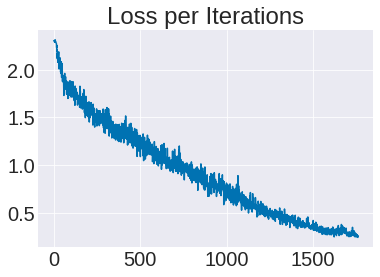

In [23]:
plt.plot(fast_net.loss_history)
plt.title("Loss per Iterations")
plt.show()


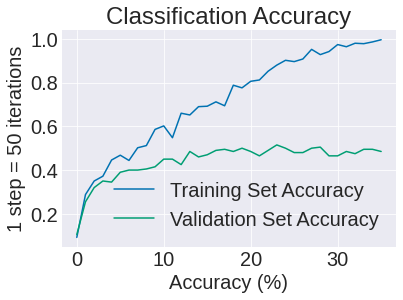

In [24]:
plt.plot(acc)
plt.plot(val)
plt.legend(["Training Set Accuracy","Validation Set Accuracy"])
plt.title("Classification Accuracy") 
plt.xlabel("Accuracy (%)")
plt.ylabel("1 step = 50 iterations")
plt.show()

### 8e. Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [32]:
def plot_weights(wts, saveFig=True, filename='convWts_adam_overfit.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    if saveFig:
        plt.savefig('convWts_adam_overfit.png')
    plt.show()

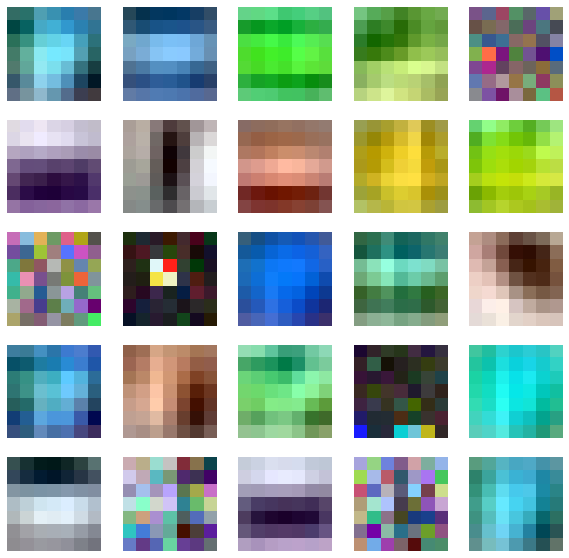

In [26]:
# Subsitute your trained network below
# netT is my network's name
# Every weight should not look like RGB noise
plot_weights(fast_net.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

### 8f. Questions

**Question 6:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

#### Note

You should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

**Answer 6:** These filters look like the neurons that react to specific, simple patterns in light on the lower levels of the network. You can make out the simple lines / angles in the filters above.

## Extensions

**General advice:** When making modifications for extensions, make small changes, then check to make sure you pass test code. Also, test out the network runtime on small examples before/after the changes. If you're not careful, the simulation time can become intractable really quickly!

**Remember:** One thorough extension usually is worth more than several "shallow" extensions.

### 0. Pedal to the metal: achieve high accuracy on STL-10

You can achieve higher (>50%) classification accuracy on the STL-10 test set. Find the hyperparameters to achieve this.

### 1. Experiment with different network architectures.

The design of the `Network` class is modular. As long as you're careful about shapes, adding/removing network layers (e.g. `Conv2D`, `Dense`, etc.) should be straight forward. Experiment with adding another sequence of `Conv2D` and `MaxPooling2D` layers. Add another `Dense` hidden layer before the output layer. How do the changes affect classification accuracy and loss? 

### 2. Experiment with different network hyperparameters.

Explore the affect one or more change below has on classification. Be careful about how the hyperparameters may affect the shape of network layers. Thorough analysis will get you more points (not try a few ad hoc values).

- Experiment with different numbers of hidden units in the Dense layers.
- Experiment different max pooling window sizes and strides.
- Experiment with kernel sizes (not 7x7). Can you get away with smaller ones? Do they perform just as well? What is the change in runtime like? What is the impact on their visualized appearance?
- Experiment with number of kernels in the convolutional layer. Is more/fewer better? What is the impact on their visualized appearance?

###  3. Add and test some training bells and whistles

Add features like early stopping, learning rate decay (learning rate at the end of an epoch becomes some fraction of its former value), etc and assess how they affect training loss convergence and accuracy. 

### 4. Additional optimizers

Research other optimizers used in backpropogation and implement one or more of them within the model structure. Compare its performance to ones you have implemented

### 5. Optimize your algorithms

Find the main performance bottlenecks in the network and improve your code to reduce runtime (e.g. reduce explicit for loops, increase vectorization, etc). Research faster algorithms to do operations like convolution and implement them. Given the complexity of the network, I suggest focusing on one area at a time and make sure everything you change passes the test code before proceeding. Quantify and discuss your performance improvements

### 6. Additional loss functions

Implement support for sigmoid, or another activation functions and associated losses. Test it out and compare with softmax/cross entropy. Make sure any necessary changes to the layer's gradient are made.

### 7. Additional datasets

Do classification and analyxe the results with an image dataset of your choice.

### 8. Performance analysis

Do a thorough comparative analysis of the non-accelerated network and accelerated networks with respect to runtime.